### Concepto de bootstrap

En estadística y machine learning, bootstrapping es una técnica de remuestreo que permite estimar la distribución de un estadístico sin necesidad de supuestos fuertes sobre la población.

¿Cómo funciona?
- Se toma una muestra original de tamaño $n$
- Se generan múltiples muestras con reemplazo del mismo tamaño $n$
- Se calcula el estadístico de interés (media, mediana, varianza, etc.) en cada muestra.
- Se usa la distribución de estos estadísticos para estimar intervalos de confianza o la variabilidad del modelo.


In [1]:
# Ejemplo
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
df = pd.DataFrame({
    'Edad': [10, 20, 30, 40, 50, 70, 80, 90, 100],
    'Default': [1, 0, 1, 1, 0, 1,0, 1,1]
})

In [2]:
# Tomar un row aleatorio
df.sample()

,Edad,Default
6,80,0


In [3]:
# Crear dataser aleatorio
df.sample(len(df))

,Edad,Default
8,100,1
6,80,0
7,90,1
2,30,1
5,70,1
4,50,0
0,10,1
1,20,0
3,40,1


In [4]:
# Crear dataser aleatorio, permitiendo remplazo
df.sample(len(df), replace=True)

,Edad,Default
2,30,1
1,20,0
6,80,0
4,50,0
5,70,1
1,20,0
0,10,1
8,100,1
3,40,1


In [5]:
df.corr()

,Edad,Default
Edad,1.000000,0.103975
Default,0.103975,1.000000


In [8]:
# Bootrstrap es entonces una técnica para crear datasets ficticios
# Ejemplo, correlación entre edad y default, varios ejemplos
correlaciones = []
for i in range(5000):
    correlaciones.append(df.sample(len(df), replace=True).corr()['Edad']['Default'])

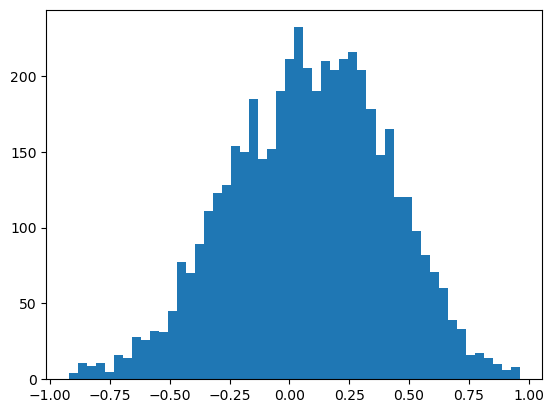

In [9]:
plt.hist(correlaciones, bins=50)
plt.show()

In [4]:
# Podemos hacer esto muchas veces y ver el histograma


In [10]:
# ¿Cual es la probabiliad que la correlación sea positiva?
df_correlaciones = pd.DataFrame()
df_correlaciones['correlaciones'] = correlaciones

In [11]:
np.mean(df_correlaciones.correlaciones > 0.5)

0.0982